#SETUP KAGGLE

https://colab.research.google.com/drive/1DLaFV4FxY-0kRUmsKRMUONMiJTITrdeN?usp=sharing

In [1]:
!pip install -q kaggle
!pip install -q transformers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c hackathon-online-fake-news-classification #download competition dataset


mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                      title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide               8KB  2023-02-01 12:22:51          10698        352  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                       119KB  2023-03-03 18:02:11           1143         39  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                            23KB  2023-02-07 18:42:21           9120        210  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions

In [17]:
!unzip /content/hackathon-online-fake-news-classification.zip

Archive:  /content/hackathon-online-fake-news-classification.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/train.csv")
df

,id,text,language,label
0,GZsDkNhz42u4SAzbAnUouC,"Last month, Mr. McLaren delivered a preliminar...",english,Real
1,jaRxYZgqXRNrxZiPiLT6xy,JOHANNESBURG (Reuters) - Leaders of Zimbabwe s...,english,Real
2,nYUyyPh5R5zxs8dPa4p6XY,“But our real goal is to reach the stage when ...,english,Real
3,myF2ZaAj2ekwKxuoN8fprG,BEN CARSON fearlessly explain the TRUTH behind...,english,Fake
4,DUQVYqAz4W6EZBy2CFevZq,They just spent big bucks on a new headquarter...,english,Fake
...,...,...,...,...
42445,T2TAxsd3ZX76QPCiCYk45S,Shawn Helton ศตวรรษที่ 21 Wireanother Active-S...,thai,Fake
42446,AEyZjphKDHLfrxbuzJDUMU,"“If we just impose a tariff, they’ll put recip...",english,Real
42447,A7XDwhEUCDctCcTmWXiq7w,"At a blistering speech in Columbus, Ohio (a ve...",english,Fake
42448,Q579MHsdizW54cN5fNBy22,JOHANNESBURG (Reuters) - South Africa s ruling...,english,Real


In [3]:
df.text[42448]

'JOHANNESBURG (Reuters) - South Africa s ruling African National Congress holds an election this weekend to replace Jacob Zuma as party leader in a closely fought contest whose winner is likely to emerge as the nation s next president.  The stakes are high because the ANC s electoral dominance means whoever wins the party s top job is likely become the next president of South Africa after a national election in 2019.Analysts have said South Africa s business and consumer confidence has been dented in recent years by allegations of corruption in Zuma s government and influence-peddling by the Gupta family - businessmen who are close friends of the president.The front runners are Deputy President Cyril Ramaphosa, a former trade union leader and one of South Africa s richest people, and Zuma s preferred candidate, his ex-wife Nkosazana Dlamini-Zuma, a former minister and chairwoman of the African Union Commission.Ramaphosa edged Dlamini-Zuma by getting the majority of nominations to becom

In [4]:
df.language.value_counts()

english    41717
thai         733
Name: language, dtype: int64

In [5]:
def reWord(text):
  replace_word = '−=豆芽扁潤餅干щ†фюжёјễậôỳđ조해방전쟁祖國解放戰爭韓ŏụả油ōīⁿmắồ,ö‐—ïベトナム独立戦争参加人の事跡に基づく越あり方関する研究井川一久係発展途を探ヴェ―そ実態と両国って歴史的意味ðæí¹α‡þβóǎ§γüäñθικλμνξοπρςστυφχψωΝΑΒΓΔΕΖΗΘΙΚΛΜΞΨΟΠΡΣΤΧΥΦΩ㊊㊋㊌㊍㊎㊏㊐㊑㊒㊓㊔㊕㊖㊗㊘㊭㊙㊚㊛㊜㊝㊢㊞㊟㊠㊡㊤㊣㊥㊦㊧㊨㊩㊪㊫㊬㊮㊯㊰ㄱㄹㄲㄳㄺㄴㄻㄵㄶㄸㄷㄼㄽㄾㅓㄿㅀㅁㅂㅃㅄㅅㅆㅈㅇㅌㅉㅊㅍㅋㅎㅏㅐㅑㅒㅔㅕㅖㅗㅘㅙㅚㅛㅜㅝㅞㅟㅠㅩㅡㅢㅥㅪㅬㅭㅨㅫㅧㅮㅯㅰㅱㅲㅳㅴㅵㅶㅷㅸㅹㅺㅻㅼㅽㅾㅿㆀㆁㆃㆂㆉㆄㆅㆊㆇㆈㆆąčĤħĩŇŘŤŴŽå/η’;[]ζδʰε₂}{지구·িষ্ণুপর|"¶:ĭ><ūथव?地球!@#ԥәэअधབོད་ཡིགᨅᨔᨕᨘᨁᨗꮳꮃꭹēᓀᐦᔭᐍᐏᐣıѣⱄⰾⱁⰲⱑⱀⱐⰽⱏडटཇངཁʋگगयचण𐌲𐌿𐍄𐌹𐍃𐌺ɩɛũļैزِଓଡ଼ିଆᱥᱟᱱᱛᱲᱤḥၽႃႇတႆး$%^&*()+-~`“”๑๒๓๔฿๕๖๗๘๙↑ʻ–⋅←→°አማርኛالعربيةܐܪܡܝمصىঅসমীয়াаврəتۆکجهбшҡотсžėšелукяіцъгиभोजपुरीবংলдàìĕ̤ṳ̄нхчйودیëӑɔŋދިވެހބަސްάòفسõøç贛語ẽગુજરાતી客家âîעבריתहिन्दհայերնւմտէӏᐃᓄᒃᑎᑐᑦ日本ქართულიқзភាសខ្មែរಕನ್ಡ한국어мकॉशٲشُыáລາວųāമലയാളംꯃꯤꯇꯩꯂꯣꯟमाठမြန်ာဘသेलषߒߞߏਪੰਜਾਬੀپنښêăãьसंृतڌпසිංහලئśůதமிழ்ತುಳతెలుగҷӣትግۇغچەїўếệ吴语მგִדשù中文言ú粵×éè±'
  text = text.replace( "\n" , ' ' )
  text = text.replace( "\t" , ' ' )
  text = text.replace("   "," ")
  text = text.replace("   "," ")
  for i in replace_word:
    text = text.replace( i , '' )
  return text

data_dict = {0 : "Real",
             1 : "Fake"}

In [6]:
from huggingface_hub import notebook_login
notebook_login()

#Transformers Phoenyx83

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("Phoenyx83/autotrain-fake-news-classification-1532855215", use_auth_token=True)
tokenizer = AutoTokenizer.from_pretrained("Phoenyx83/autotrain-fake-news-classification-1532855215", use_auth_token=True)

In [ ]:
inputs = tokenizer(reWord(df.text[0]) , return_tensors="pt" )
outputs = model(**inputs)
logits = outputs.logits.detach().tolist()[0]
max_index = logits.index(max(logits))
print(data_dict[max_index])

In [ ]:
# 0 Real 1 Fake
inputs = tokenizer(reWord(df.text[3]) , return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits.detach().tolist()[0]
max_index = logits.index(max(logits))
print(data_dict[max_index])

Real


In [ ]:
# from transformers import AutoModelForSequenceClassification, AutoTokenizer

# model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased")
# tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

inputs = tokenizer.encode(df_test.text[5], return_tensors="pt", max_length=1512, truncation=True)
outputs = model(inputs)
logits = outputs.logits.detach().tolist()[0]
max_index = logits.index(max(logits))
print(data_dict[max_index])



#Transformers cometrain


In [ ]:
!pip install sentencepiece
!pip install transformers -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("cometrain/fake-news-detector-t5")
modelcometrain = AutoModelForSeq2SeqLM.from_pretrained("cometrain/fake-news-detector-t5")

In [ ]:
df

,id,text,language,label
0,GZsDkNhz42u4SAzbAnUouC,"Last month, Mr. McLaren delivered a preliminar...",english,Real
1,jaRxYZgqXRNrxZiPiLT6xy,JOHANNESBURG (Reuters) - Leaders of Zimbabwe s...,english,Real
2,nYUyyPh5R5zxs8dPa4p6XY,“But our real goal is to reach the stage when ...,english,Real
3,myF2ZaAj2ekwKxuoN8fprG,BEN CARSON fearlessly explain the TRUTH behind...,english,Fake
4,DUQVYqAz4W6EZBy2CFevZq,They just spent big bucks on a new headquarter...,english,Fake
...,...,...,...,...
42445,T2TAxsd3ZX76QPCiCYk45S,Shawn Helton ศตวรรษที่ 21 Wireanother Active-S...,thai,Fake
42446,AEyZjphKDHLfrxbuzJDUMU,"“If we just impose a tariff, they’ll put recip...",english,Real
42447,A7XDwhEUCDctCcTmWXiq7w,"At a blistering speech in Columbus, Ohio (a ve...",english,Fake
42448,Q579MHsdizW54cN5fNBy22,JOHANNESBURG (Reuters) - South Africa s ruling...,english,Real


In [ ]:
# 0 Real 1 Fake
input_ids = tokenizer.encode(df_test["text"][98], return_tensors='pt')

output = modelcometrain.generate(input_ids,
                        max_length=1515, 
                        num_beams=1, 
                        early_stopping=True)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print(len(input_ids[0]))

Token indices sequence length is longer than the specified maximum sequence length for this model (869 > 512). Running this sequence through the model will result in indexing errors


true
869


#Transformers jy46604790

In [ ]:
from transformers import pipeline
MODEL = "jy46604790/Fake-News-Bert-Detect"
clf = pipeline("text-classification", model=MODEL, tokenizer=MODEL)

In [ ]:
result = clf(df)
result

# Kaggle Fake News Keras/BERT

https://www.kaggle.com/code/tmishinev/fake-news-keras-bert

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import gc

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from sklearn.model_selection import train_test_split 
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.python.client import device_lib
from transformers import AutoTokenizer, TFBertModel

SEED = 10

In [8]:
df['label'] = pd.factorize(df['label'])[0]

In [9]:
X = df['text']
y = df['label']

##EDA

In [10]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Distribution of Fake - 0 /Real - 1 News')

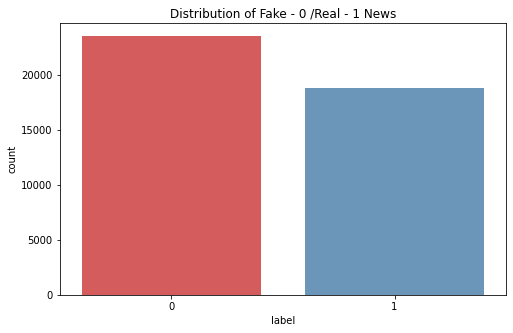

In [11]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['label'], palette = 'Set1', alpha = 0.8)
plt.title('Distribution of Fake - 0 /Real - 1 News')

##Define Model

In [12]:
#define the LSTM model
MAX_LEN = 100

# def get_model():
#     tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
#     bert = TFBertModel.from_pretrained('bert-base-uncased')
    
#     model = tf.keras.Sequential([
#         bert.bert,
#         tf.keras.layers.Dense(2, activation='softmax')
#     ])
    
#     optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
#     return model


def get_model():
    dropout_rate = 0.2

    input_ids = Input(shape = (MAX_LEN,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (MAX_LEN,), dtype = tf.int32, name = 'input_mask')

    embeddings = bert([input_ids, input_mask])[1] #pooler output
    print(embeddings)

    out = Dropout(0.2)(embeddings)
    
    #64 units dense layer
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)

    y = Dense(1,activation = 'sigmoid')(out)
    
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True
    
    #define optimizer
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-05, epsilon=1e-08,decay=0.01,clipnorm=1.0)
    
    #complile the model
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    
    return model

#define tokenization function
def get_tokens(X):
    
    X = tokenizer(
                text = list(X),
                add_special_tokens = True,
                max_length = MAX_LEN,
                truncation = True,
                padding = True,
                return_tensors = 'tf',
                return_token_type_ids = False,
                return_attention_mask = True,
                verbose = True
                )
    
    return X

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf_bert_model/bert/pooler/dense/Tanh:0', description="created by layer 'tf_bert_model'")


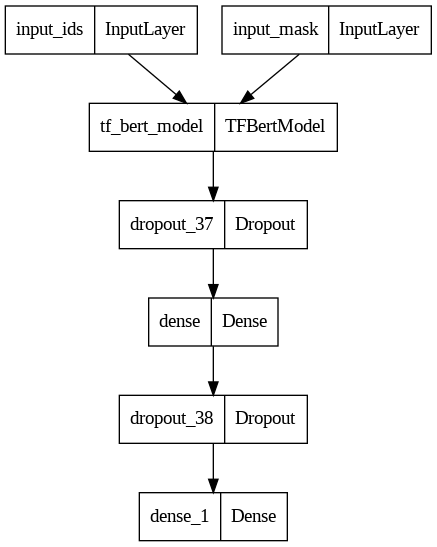

In [13]:
#plot the model architecture
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

model = get_model()
tf.keras.utils.plot_model(model)

##Train and evaluate

In [14]:
#split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = SEED)

##Training the model

In [15]:
X_train_seq = get_tokens(X_train)
X_test_seq = get_tokens(X_test)


In [16]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [ ]:
history = model.fit(x = {'input_ids':X_train_seq['input_ids'],'input_mask':X_train_seq['attention_mask']}, 
                    y = y_train, epochs=3,
                    validation_split = 0.2, batch_size = 32, callbacks=[EarlyStopping(monitor='val_accuracy',mode='max', patience=3, verbose=False,restore_best_weights=True)])


In [ ]:
#plot the train/validation loss and accuracy
def plot_graphs(history, metric):
    
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

##Evaluate the model

In [ ]:
#predict the test set labels
yhat =  np.where(model.predict({'input_ids':X_test_seq['input_ids'],'input_mask':X_test_seq['attention_mask']}) >=0.5,1,0)

In [ ]:
## print classification report
print(classification_report(y_test,yhat))

In [ ]:
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,yhat), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [ ]:
#save the model 
model.save('fake_news_bert.h5')
model.save_weights("fake_news_bert_weights")

#ML

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/train.csv")
df_i = pd.read_csv("/content/test.csv")

text_train = df["text"].apply(reWord)
label_train = df["label"]

text_test = df_i["text"].apply(reWord)

# Convert the text data into numerical representations using TF-IDF
vectorizer = TfidfVectorizer()
text_train_tfidf = vectorizer.fit_transform(text_train)
text_test_tfidf = vectorizer.transform(text_test)


In [57]:
text_train_tfidf, text_val_tfidf, label_train, label_val = train_test_split(text_train_tfidf, label_train, test_size=0.1, random_state=42)

##PassiveAggressiveClassifier

In [ ]:
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier

model_PassiveAggressive = PassiveAggressiveClassifier(max_iter=10000, tol=1e-4)
model_PassiveAggressive.fit(text_train_tfidf, label_train)
predictions = model_PassiveAggressive.predict(text_val_tfidf)
accuracy_score(label_val, predictions)

0.9142520612485276

##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(text_train_tfidf, label_train)
predictions = model_LogisticRegression.predict(text_val_tfidf)
accuracy_score(label_val, predictions)

0.9140164899882215

##LogisticRegression + cross_validate

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

model_LogisticRegression = LogisticRegression()

cv_results = cross_validate(model_LogisticRegression, text_train_tfidf, label_train, cv=5, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_score'].mean(), cv_results['test_score'].std() * 2))


Accuracy: 0.92 (+/- 0.00)


In [ ]:
predictions = model_LogisticRegression.predict(text_test_tfidf)

##MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_MultinomialNB = MultinomialNB()
model_MultinomialNB.fit(text_train_tfidf, label_train)
predictions = model_MultinomialNB.predict(text_val_tfidf)
accuracy_score(label_val, predictions)

0.7941107184923439

##MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

model_MLPClassifier = MLPClassifier() #hidden_layer_sizes=hidden_layer
model_MLPClassifier.fit(text_train_tfidf, label_train)
predictions = model_MLPClassifier.predict(text_val_tfidf)
accuracy_score(label_val, predictions)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9313898704358068

In [ ]:
predictions = model_MLPClassifier.predict(text_test_tfidf)

In [ ]:
[coef.shape for coef in model_MLPClassifier.coefs_]

[(305146, 100),
 (100, 128),
 (128, 256),
 (256, 64),
 (64, 100),
 (100, 32),
 (32, 16),
 (16, 8),
 (8, 1)]

##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

RandomForest = RandomForestClassifier(n_estimators=300)
RandomForest.fit(text_train_tfidf, label_train)
predictions = RandomForest.predict(text_val_tfidf)
accuracy_score(label_val, predictions)

##RandomForestClassifier + cross_validate

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

RandomForest = RandomForestClassifier(n_estimators=300)

cv_results = cross_validate(RandomForest, text_train_tfidf, label_train, cv=5, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_score'].mean(), cv_results['test_score'].std() * 2))

##SVC

In [ ]:
from sklearn.svm import SVC

model_clf = SVC()
model_clf.fit(text_train_tfidf, label_train)
predictions = model_clf.predict(text_val_tfidf)
accuracy_score(label_val, predictions)

##VotingClassifier + cross_validate

In [63]:
# Ensemble model
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression


mnb = MultinomialNB()
lr = LogisticRegression()
mlp = PassiveAggressiveClassifier(max_iter=10000, tol=1e-4)

ensemble_model = VotingClassifier(estimators=[('mnb', mnb), ('lr', lr), ('mlp', mlp)], voting='hard')
ensemble_model.fit(text_train_tfidf, label_train)
cv_results = cross_validate(ensemble_model, text_train_tfidf, label_train, cv=5, scoring='accuracy')

predictions = ensemble_model.predict(text_val_tfidf)
accuracy = accuracy_score(label_val, predictions)

print("Accuracy:", accuracy)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_score'].mean(), cv_results['test_score'].std() * 2))

Accuracy: 0.9130742049469964
Accuracy: 0.92 (+/- 0.01)


In [ ]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(ensemble_model, text_val_tfidf, label_val, cv=5)
accuracy = accuracy_score(label_train, predictions)
print("Accuracy:", accuracy)

In [ ]:
predictions = ensemble_model.predict(text_val_tfidf)
accuracy_score(label_val, predictions)

0.9209658421672556

#DL

In [27]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU , Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding #RNNs
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/train.csv")
df_i = pd.read_csv("/content/test.csv")

text_train = df["text"].apply(reWord)
label_train = df["label"]

text_test = df_i["text"].apply(reWord)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text_train)

text_train_seq = tokenizer.texts_to_sequences(text_train)
text_test_seq = tokenizer.texts_to_sequences(text_test)

max_len = 481
text_train_seq = pad_sequences(text_train_seq, maxlen=max_len)
text_test_seq = pad_sequences(text_test_seq, maxlen=max_len)

text_train_seq, text_val_seq, label_train, label_val = train_test_split(text_train_seq, label_train, test_size=0.2, random_state=42)

label_train = np.array(pd.get_dummies(label_train))
label_val = np.array(pd.get_dummies(label_val))



In [69]:
from tensorflow.keras.layers import Flatten

##LSTM + DNN

In [70]:
# Build the model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_len))
# model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2 ,return_sequences=True)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(text_train_seq, label_train, 
          validation_data=(text_val_seq, 
                           label_val), 
          epochs=5, 
          batch_size=128)

In [ ]:
from sklearn.metrics import accuracy_score

In [38]:
predictions = model.predict(text_val_seq)
best_positions = np.argmax(predictions, axis=1)
result = np.zeros_like(predictions, dtype=np.uint8)
result[np.arange(len(best_positions)), best_positions] = 1
accuracy_score(label_val, result)

266/266 [==============================] - 1s 4ms/step


0.9143698468786808

In [39]:
prediction = model.predict(text_test_seq)
predicted_class_index = np.argmax(prediction)
predicted_class_index

654/654 [==============================] - 3s 4ms/step


173

In [40]:
best_positions = np.argmax(prediction, axis=1)
best_positions

array([1, 0, 1, ..., 1, 1, 1])

# Kaggle Fake News Classification

https://www.kaggle.com/code/sabarostami/fake-news-classification

In [29]:
import tensorflow as tf

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 481, 128)          640000    
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 664,898
Trainable params: 664,898
Non-trainable params: 0
________________________________________________

In [37]:
# Train the model
model.fit(text_train_seq, label_train, 
          validation_data=(text_val_seq, 
                           label_val), 
          epochs=5, 
          batch_size=128)

Epoch 1/5
266/266 [==============================] - 30s 105ms/step - loss: 0.3409 - accuracy: 0.8344 - val_loss: 0.1963 - val_accuracy: 0.9271
Epoch 2/5
266/266 [==============================] - 13s 48ms/step - loss: 0.1695 - accuracy: 0.9346 - val_loss: 0.1948 - val_accuracy: 0.9205
Epoch 3/5
266/266 [==============================] - 13s 48ms/step - loss: 0.1429 - accuracy: 0.9455 - val_loss: 0.1935 - val_accuracy: 0.9272
Epoch 4/5
266/266 [==============================] - 12s 44ms/step - loss: 0.1263 - accuracy: 0.9511 - val_loss: 0.1943 - val_accuracy: 0.9278
Epoch 5/5
266/266 [==============================] - 14s 53ms/step - loss: 0.1122 - accuracy: 0.9572 - val_loss: 0.2315 - val_accuracy: 0.9144


#Predict

In [42]:
df_test = pd.read_csv("/content/test.csv")
df_test

,id,text,language
0,63e2vyej6oXukEfDdoGuA5,"— Holger Stark (@holger_stark) January 20, 2...",english
1,ZjYG72fdvd6JmazkS32ZFx,Can you hear us now?If they keep this up Disne...,english
2,ZYUhHXzaDxtncvd6nw8yiy,“I’ve witnessed him as a businessman sitting a...,english
3,HejAe5F5BGKD4HUYMT9DTg,"WASHINGTON (Sputnik) — Earlier in the day, loc...",english
4,5ZjAEKgz9RCsBykjtYyp4S,A world where our resources are applied creati...,english
...,...,...,...
20904,W425RhXCDso796s9LWrCye,"Friday on ABC’s “The View,” senior for Brei...",english
20905,EWwMtde6s3skSDmLKXPojr,Conservative pundit Sean Hannity leveled what ...,english
20906,afMmnJ6K3LSpsHSPbaSr45,The court said Samsung s financial support of ...,english
20907,MCakJo4x4pkoELSiPvtgkB,[The drapes were a change from the crimson dra...,english


In [43]:
df_test["text"] = df_test["text"].apply(reWord)

In [44]:
data_dict2 = {"LABEL_0":"Fake",
              "LABEL_1":"Real"}

In [ ]:
result = clf(df_test.text[1])
data_dict2[result[0]['label']]

In [48]:
df_submission = pd.read_csv("/content/sample_submission.csv")
df_submission

,id,label
0,63e2vyej6oXukEfDdoGuA5,Real
1,ZjYG72fdvd6JmazkS32ZFx,Fake
2,ZYUhHXzaDxtncvd6nw8yiy,Fake
3,HejAe5F5BGKD4HUYMT9DTg,NaN
4,5ZjAEKgz9RCsBykjtYyp4S,NaN
...,...,...
20904,W425RhXCDso796s9LWrCye,NaN
20905,EWwMtde6s3skSDmLKXPojr,NaN
20906,afMmnJ6K3LSpsHSPbaSr45,NaN
20907,MCakJo4x4pkoELSiPvtgkB,NaN


In [ ]:
df_submission2 = pd.read_csv("/content/Submission_SS.csv")
df_submission2

,id,label
0,63e2vyej6oXukEfDdoGuA5,Real
1,ZjYG72fdvd6JmazkS32ZFx,Fake
2,ZYUhHXzaDxtncvd6nw8yiy,Fake
3,HejAe5F5BGKD4HUYMT9DTg,Fake
4,5ZjAEKgz9RCsBykjtYyp4S,Fake
...,...,...
20904,W425RhXCDso796s9LWrCye,Real
20905,EWwMtde6s3skSDmLKXPojr,Fake
20906,afMmnJ6K3LSpsHSPbaSr45,Real
20907,MCakJo4x4pkoELSiPvtgkB,Real


In [ ]:
df_submission2["label"][12]

'Fake'

##P_transformers

In [ ]:
df_test["text"][2]

'Ive witnessed hi as a businessan sitting at the desk Ive witnessed hi as a potential candidate sitting at the desk Ive witnessed hi as a candidate sitting at the desk and Ive now witnessed hi as the sitting at the desk said Kellyanne Conway a senior adviser.He is worried his aides say that he will not be able to keep his Android phone once he gets to the White House and wonders aloud how isolated he will becoe   and whether he will be able to keep in touch with his friends   without it as president.He is proud they say that he has so rapidly naed people for his cabinet and senior staff including a group of hawks and loyalists  Senator Jeff Sessions of Alabaa as attorney general  Michael T. Flynn as national security adviser  Representative Mike Popeo of Kansas as director of the C. I. A. and Stephen K. Bannon the executive chairan of Breitbart News as chief strategist.As a parade of job seekers TV talking heads and statesen like Henry Kissinger paraded through the lobby of Trup Tower 

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base-openai-detector")
model = AutoModelForSequenceClassification.from_pretrained("roberta-base-openai-detector")

Some weights of the model checkpoint at roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for idx,row in df_test.iterrows():
  if idx > 2:
    inputs = tokenizer(df_test["text"][idx], return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits.detach().tolist()[0]
    max_index = logits.index(max(logits))
    df_submission["label"][idx] = (data_dict[max_index])
  if idx % 100 == 0:
    print(idx)

df_submission.to_csv('Submission.csv',encoding='utf-8-sig',index=False)

In [ ]:
# 0 Real 1 Fake
t = 0
for idx,row in df_test.iterrows():
  if idx > 2:
    try:
      result = clf(df_test.text[idx])
      df_submission["label"][idx] = data_dict2[result[idx]['label']]
      t += 1
    except:
      df_submission["label"][idx] = df_submission2["label"][idx]

    # df_submission["label"][idx] = (data_dict[max_index])
  if idx % 100 == 0:
    print(idx)

df_submission.to_csv('Submission.csv',encoding='utf-8-sig',index=False)
t

In [ ]:
df_submission

,id,label
0,63e2vyej6oXukEfDdoGuA5,Real
1,ZjYG72fdvd6JmazkS32ZFx,Fake
2,ZYUhHXzaDxtncvd6nw8yiy,Fake
3,HejAe5F5BGKD4HUYMT9DTg,Fake
4,5ZjAEKgz9RCsBykjtYyp4S,Fake
...,...,...
20904,W425RhXCDso796s9LWrCye,Real
20905,EWwMtde6s3skSDmLKXPojr,Fake
20906,afMmnJ6K3LSpsHSPbaSr45,Real
20907,MCakJo4x4pkoELSiPvtgkB,Real


##P_ML

In [ ]:
predictions

array(['Fake', 'Fake', 'Real', ..., 'Real', 'Real', 'Real'], dtype='<U4')

In [50]:
data_dict = {0:'Fake',
             1:'Real'}

best_positions

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
data_dict[best_positions[0]]

'Real'

In [ ]:
predictions

array(['Real', 'Fake', 'Real', ..., 'Real', 'Real', 'Real'], dtype='<U4')

In [51]:
for idx, row in df_test.iterrows():
    if idx > 2:
      df_submission["label"][idx] = data_dict[best_positions[idx]]

    if idx % 1000 == 0:
      print(idx)

df_submission.to_csv("Submission.csv", encoding="utf-8-sig", index=False)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [52]:
df_submission

,id,label
0,63e2vyej6oXukEfDdoGuA5,Real
1,ZjYG72fdvd6JmazkS32ZFx,Fake
2,ZYUhHXzaDxtncvd6nw8yiy,Fake
3,HejAe5F5BGKD4HUYMT9DTg,Real
4,5ZjAEKgz9RCsBykjtYyp4S,Fake
...,...,...
20904,W425RhXCDso796s9LWrCye,Real
20905,EWwMtde6s3skSDmLKXPojr,Fake
20906,afMmnJ6K3LSpsHSPbaSr45,Real
20907,MCakJo4x4pkoELSiPvtgkB,Real


In [ ]:
for idx, row in df_test.iterrows():
    if idx > 2:
      df_submission["label"][idx] = predictions[idx]

    if idx % 1000 == 0:
      print(idx)

df_submission.to_csv("Submission.csv", encoding="utf-8-sig", index=False)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [ ]:
df_submission

,id,label
0,63e2vyej6oXukEfDdoGuA5,Real
1,ZjYG72fdvd6JmazkS32ZFx,Fake
2,ZYUhHXzaDxtncvd6nw8yiy,Fake
3,HejAe5F5BGKD4HUYMT9DTg,Fake
4,5ZjAEKgz9RCsBykjtYyp4S,Fake
...,...,...
20904,W425RhXCDso796s9LWrCye,Real
20905,EWwMtde6s3skSDmLKXPojr,Fake
20906,afMmnJ6K3LSpsHSPbaSr45,Real
20907,MCakJo4x4pkoELSiPvtgkB,Real


In [ ]:
for idx,row in df_test.iterrows():
  if idx > 2:
    input_ids = tokenizer.encode(df_test["text"][idx], return_tensors='pt')
    output = modelcometrain.generate(input_ids,
                        max_length=1515, 
                        num_beams=1, 
                        early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    if generated_text == "true":
        df_submission["label"][idx] = "Real"
    elif generated_text == "fake":
        df_submission["label"][idx] = generated_text
  if idx % 100 == 0:
    print(idx)

df_submission.to_csv('Submission.csv',encoding='utf-8-sig',index=False)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500


#Submission to Kaggle

In [ ]:
!kaggle competitions submit -c hackathon-online-fake-news-classification -f /content/Submission.csv -m "time 1 random"

100% 572k/572k [00:04<00:00, 141kB/s]
Successfully submitted to Hackathon Online: Fake News Classification